# Clustering assignment

### K-Means Cluster modelling

### Use K-Means cluster analysis to cluster different iris species. 

In [31]:
#Modules used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from IPython.display import display

In [2]:
#Reading the csv using pandas
flowers = pd.read_csv('Iris.csv')
flowers.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data evaluation

In [3]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
flowers = flowers.drop(['Id'], axis=1)

In [5]:
flowers.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
flowers.shape

(150, 5)

In [7]:
flowers.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [8]:
#Checking for any null values
flowers.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

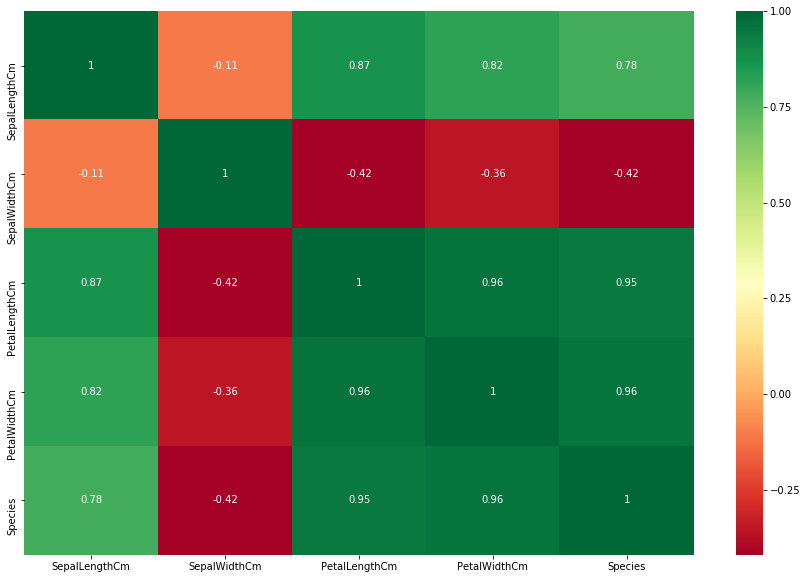

In [9]:
plt.figure(figsize=(15,10))
p=sns.heatmap(flowers.corr(), annot=True,cmap='RdYlGn') 

### The heatmap is for looking at the features that are relevant to get the outcome. We can see that SepalWidthCm seems to be less relevant as compared to the other features.

In [29]:
#independent and dependent variables
X = flowers.iloc[:,0:4]
y = flowers.iloc[:,-1]

Text(0.5, 1.0, 'Petal')

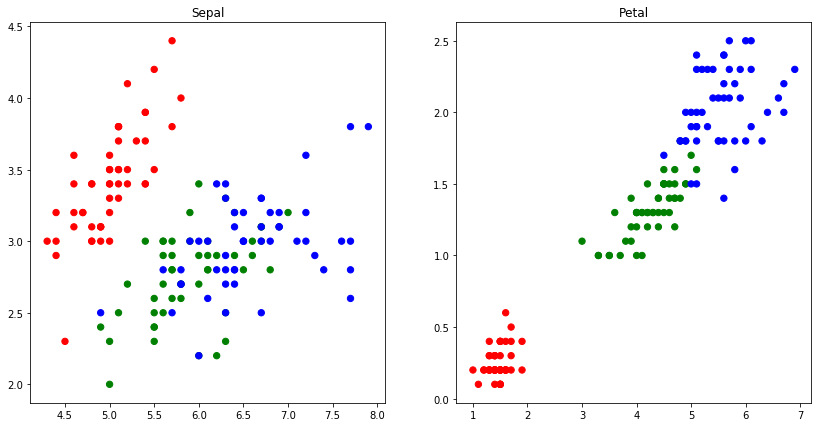

In [28]:
# Set the size of the plot
plt.figure(figsize=(14,7))

X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y.columns = ['Species']

# Create a colormap
colormap = np.array(['red', 'green', 'blue'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[y], s=40)
plt.title('Sepal')

#Plot Petal
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y], s=40)
plt.title('Petal')

In [34]:
nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Make an elbow plot and/or use silhouette analysis to find the optimal number of clusters.

#### Silhouette score - a value near +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.


In [35]:
#The elbow method finds the optimal value for k (#clusters).
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5525919445499757